In [1]:
import os
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from paths import *
import numpy as np
import pandas as pd

In [6]:
model = joblib.load(os.path.join(OUTPUT_PATH, "GLM_shortChain_fattyAcid_without_outlier_sample_serum_feces_ratio.joblib"))

model_list = [model]
model_name_list = ["Without outlier"]


In [15]:
disease_coeff = []
pval_thresh = 0.05

for model in model_list:
    disease_coeff_model = []
    for item in model:
        if (item["model"].pvalues["Disease_label"] < pval_thresh) & (item["model"].converged==1):
            disease_coeff_model.append(item["model"].params["Disease_label"])
        else:
            disease_coeff_model.append(None)
    disease_coeff.append(disease_coeff_model)
        
analyte_list = []
for item in model_1:
    analyte_list.append(item["analyte"])
    
disease_coeff = np.array(disease_coeff).transpose()
disease_coeff[disease_coeff == None] = np.nan
disease_coeff = np.where(disease_coeff == None, np.nan, disease_coeff).astype(float)
disease_coeff_df = pd.DataFrame(disease_coeff, index=analyte_list, columns=model_name_list)
disease_coeff_df.reset_index(inplace=True)
disease_coeff_df.rename(columns={"index":"analyte_name", "Without outlier":"disease_coeff"}, inplace=True)
disease_coeff_df

,analyte_name,disease_coeff
0,2-Methylbutyric acid,-0.133243
1,Acetic acid,0.313652
2,Butyric acid,0.300880
3,Hexanoic acid,NaN
4,Isobutyric acid,NaN
5,Isovaleric acid,-0.161534
6,Propionic acid,0.297206
7,Valeric acid,NaN


In [17]:
sorted_df = disease_coeff_df.dropna().sort_values(by="disease_coeff", ascending=False)

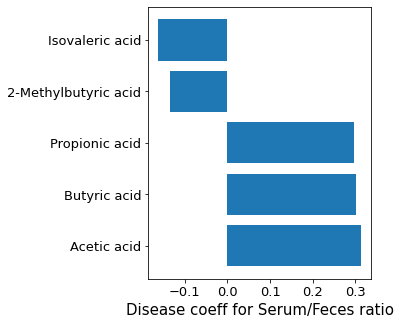

Saving the figure ...


In [26]:
FIG_SIZE = (4, 5)
FONTSIZE = 13
LABELSIZE = 15

filename_suffix_list = ["combined_population", "ms_treated_population", "ms_not_treated_population"]

fig, ax = plt.subplots(figsize=FIG_SIZE)
plt.barh(sorted_df["analyte_name"], sorted_df["disease_coeff"])
plt.xticks(fontsize=FONTSIZE)
plt.yticks(fontsize=FONTSIZE)
plt.xlabel('Disease coeff for Serum/Feces ratio', fontsize=LABELSIZE)
# plt.ylabel('Analyte name', fontsize=LABELSIZE)
plt.show()

print('Saving the figure ...')
fig_filename = os.path.join(OUTPUT_PATH, "figures", "disease_coeff_plot_for_the_serum_feces_ratio_for_targeted_compounds_using_combined_population.svg")
fig.savefig(fig_filename, format='svg', bbox_inches='tight')

